In [3]:
#%pip install pyodbc
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install pyodbc

     -------------------------------------- 14.7/14.7 MB 580.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\lizat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 10.6/10.6 MB 580.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lizat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ---------------------------------------- 7.2/7.2 MB 496.3 kB/s eta 0:00:00
     -------------------------------------- 36.9/36.9 MB 418.3 kB/s eta 0:00:00
     --------------------------------------- 55.4/55.4 KB 38.5 kB/s eta 0:00:00
     ------------------------------------ 930.9/930.9 KB 191.3 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 3.3/3.3 MB 174.2 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\lizat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the 'C:\Users\lizat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 73.2/73.2 KB 182.9 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\lizat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

In [5]:
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=LAPTOP-MNKFJKKH;'
                      'Database=AdventureWorksDW2016;'
                      'Trusted_Connection=yes;')

In [6]:
sql = """select concat(a.FirstName,' ',a.LastName) as CustomerName, 
		b.OrderDate, 
		year(b.OrderDate) as year,
		month(b.OrderDate) as month,
		b.SalesAmount, 
		c.CurrencyAlternateKey,
		d.EnglishProductName as Product,
		e.EnglishProductSubcategoryName as SubCategory,
		f.EnglishProductCategoryName as Category
from [dbo].[DimCustomer] a, 
		[dbo].[FactInternetSales] b, 
		[dbo].[DimCurrency] c,
		[dbo].[DimProduct] d,
		[dbo].[DimProductSubcategory] e,
		[dbo].[DimProductCategory] f
where a.CustomerKey = b.CustomerKey
and b.CurrencyKey = c.CurrencyKey
and b.ProductKey = d.ProductKey
and d.ProductSubcategoryKey = e.ProductSubcategoryKey
and e.ProductCategoryKey = f.ProductCategoryKey 
and b.OrderDate <= '2013-12-31'"""

In [7]:
df = pd.read_sql(sql, conn)
df.head()

C:\Users\lizat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerName,OrderDate,year,month,SalesAmount,CurrencyAlternateKey,Product,SubCategory,Category
0,Ruben Prasad,2010-12-29,2010,12,699.0982,USD,"Road-650 Black, 62",Road Bikes,Bikes
1,Christy Zhu,2010-12-29,2010,12,3399.9900,AUD,"Mountain-100 Silver, 44",Mountain Bikes,Bikes
2,Colin Anand,2010-12-30,2010,12,3578.2700,USD,"Road-150 Red, 44",Road Bikes,Bikes
3,Abigail Henderson,2011-01-01,2011,1,3578.2700,DEM,"Road-150 Red, 44",Road Bikes,Bikes
4,Alexandra Watson,2011-01-02,2011,1,699.0982,AUD,"Road-650 Black, 62",Road Bikes,Bikes


In [8]:
total_sales = round(df['SalesAmount'].sum(),2)
total_sales

29312982.5

In [9]:
ytd_df = df[df['year'] == df['year'].max()]
ytd_df.head()

,CustomerName,OrderDate,year,month,SalesAmount,CurrencyAlternateKey,Product,SubCategory,Category
1490,Cindy Patel,2013-01-01,2013,1,2294.99,USD,"Mountain-200 Black, 42",Mountain Bikes,Bikes
1491,Cindy Patel,2013-01-01,2013,1,4.99,USD,Water Bottle - 30 oz.,Bottles and Cages,Accessories
1492,Cindy Patel,2013-01-01,2013,1,9.99,USD,Mountain Bottle Cage,Bottles and Cages,Accessories
1493,Kaylee Gray,2013-01-01,2013,1,564.99,USD,"Mountain-500 Silver, 42",Mountain Bikes,Bikes
1494,Kaylee Gray,2013-01-01,2013,1,24.99,USD,LL Mountain Tire,Tires and Tubes,Accessories


In [10]:
ytd_s = round(ytd_df['SalesAmount'].sum(),2)
ys = [ytd_s]
ytd_sales = pd.DataFrame(ys, columns=['ytd_sales']) 
ytd_sales

,ytd_sales
0,16351550.34


In [11]:
txn_m = len(pd.unique(ytd_df['CustomerName']))
tm = [txn_m]
txn_merch = pd.DataFrame(tm, columns=['txn_merch']) 
txn_merch

,txn_merch
0,17354


In [12]:
ytd_category = ytd_df.groupby("Category").sum()[["SalesAmount"]]
ytd_category

,SalesAmount
Category,
Accessories,668241.53
Bikes,15359502.36
Clothing,323806.45


In [13]:
ytd_curr = ytd_df.groupby("CurrencyAlternateKey").sum()[["SalesAmount"]]
ytd_curr

,SalesAmount
CurrencyAlternateKey,
AUD,4338938.60
CAD,1085563.26
GBP,2124358.41
USD,8802690.07


In [14]:
yr_trend = df.groupby("year").sum()[["SalesAmount"]]
yr_trend

,SalesAmount
year,
2010,4.342104e+04
2011,7.075526e+06
2012,5.842485e+06
2013,1.635155e+07


In [15]:
mth_trend = ytd_df.groupby("month").sum()[["SalesAmount"]]
mth_trend

,SalesAmount
month,
1,857689.91
2,771348.74
3,1049907.39
4,1046022.77
5,1284592.93
6,1643177.78
7,1371675.81
8,1551065.56
9,1447495.69


In [16]:
%matplotlib inline

ValueError: not enough values to unpack (expected 2, got 1)

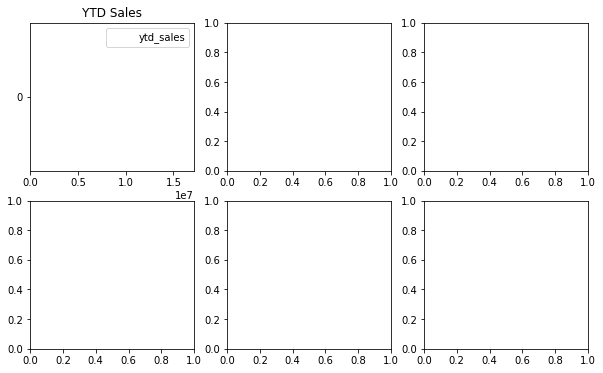

In [17]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 3, 3)
ax3 = fig.add_subplot(2, 3, 4)
ax4 = fig.add_subplot(2, 3, 5)
ax5 = fig.add_subplot(2, 3, 6)

       
# Subplot 1: Barh plot
for index, value in enumerate(ytd_sales.index):
    label = ytd_sales['ytd_sales'][value] 
ytd_sales.plot(kind='barh', color='white', figsize=(10, 6), ax=ax0) # add to subplot 1
ax0.set_title('YTD Sales')
for k, v in ytd_sales.iterrows():
   ax0.annotate(k, v)

# Subplot 2: Barh plot
txn_merch.plot(kind='barh', color='white', figsize=(10, 6), ax=ax1) # add to subplot 2
ax1.set_title('Transacting Merchants')

# Subplot 3: Pie Chart
colors_list = ['gold', 'lightcoral', 'lightskyblue']
explode_list = [0, 0.2, 0.1] # ratio for each continent with which to offset each wedge.
ytd_category['SalesAmount'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.0f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list,
                            ax=ax2 # 'explode' lowest 3 continents
                            ) # add to subplot 3
ax2.set_title('YTD Sales by Currency')
ax2.axis('equal') 
ax2.legend(labels=ytd_category.index, loc='upper left') 

# Subplot 4: Barh plot
ytd_curr.plot(kind='barh', color='blue', figsize=(15, 6), ax=ax3) # add to subplot 2
ax3.set_title('YTD Sales by Currency')
ax3.set_ylabel('Currency')
ax3.set_xlabel('YTD Sales')

# Subplot 5: Line plot
yr_trend.plot(kind='line', figsize=(15, 6), ax=ax4) # add to subplot 2
ax4.set_title ('Yearly Sales Trend')
ax4.set_ylabel('Sales')
ax4.set_xlabel('Years')

# Subplot 6: Line plot
mth_trend.plot(kind='line', figsize=(15, 6), ax=ax5) # add to subplot 2
ax5.set_title ('Monthly YTD Sales Trend')
ax5.set_ylabel('Sales')
ax5.set_xlabel('Month')

plt.show()